In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import tensorflow.keras
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
df = pd.read_csv("./covid-19.csv", sep=";")

In [3]:
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1.03.2020,0.0,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1.04.2020,0.0,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,...,0,NaN,????????,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,...,0,NaN,????????,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'international_traveler', 'domestic_traveler',
       'exposure_start', 'exposure_end', 'traveler', 'visiting Wuhan',
       'from Wuhan', 'death', 'recovered', 'symptom', 'source', 'link',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [5]:
df= df.drop(['id','case_in_country','reporting date','summary','location','country','symptom_onset', 'If_onset_approximated',
             'hosp_visit_date', 'international_traveler', 'domestic_traveler','exposure_start', 'exposure_end',
            'symptom', 'source', 'link','Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26','Unnamed: 27', 'Unnamed: 28'], axis=1)

In [6]:
df.head()

,gender,age,traveler,visiting Wuhan,from Wuhan,death,recovered
0,male,66.0,NaN,1.0,0.0,0,0
1,female,56.0,NaN,0.0,1.0,0,0
2,male,46.0,NaN,0.0,1.0,0,0
3,female,60.0,NaN,1.0,0.0,0,0
4,male,58.0,NaN,0.0,0.0,0,0


In [7]:
df.isnull().sum()

gender            1712
age               1890
traveler          2737
visiting Wuhan    1791
from Wuhan        1795
death             1778
recovered         1791
dtype: int64

In [8]:
df =df.dropna()
df.isnull().sum()

gender            0
age               0
traveler          0
visiting Wuhan    0
from Wuhan        0
death             0
recovered         0
dtype: int64

In [9]:
df

,gender,age,traveler,visiting Wuhan,from Wuhan,death,recovered
197,male,48.0,1.0,1.0,0.0,0,0
198,male,31.0,1.0,0.0,1.0,0,2.12.2020
199,female,30.0,1.0,0.0,1.0,0,2.12.2020
200,male,80.0,1.0,0.0,1.0,2/14/2020,0
209,female,33.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
3388,male,28.0,1.0,0.0,0.0,0,0
3392,male,26.0,1.0,0.0,0.0,0,0
3393,female,30.0,1.0,0.0,0.0,0,0
3394,male,49.0,1.0,0.0,0.0,0,0


In [10]:
for i in df['death'].values:
    if i=='0':
        pass
    else:
        df['death'] = df['death'].mask(df['death'].eq(i),'1')

In [11]:
for i in df['recovered'].values:
    if i=='0':
        pass
    else:
        df['recovered'] = df['recovered'].mask(df['recovered'].eq(i),'1')

In [12]:
df

,gender,age,traveler,visiting Wuhan,from Wuhan,death,recovered
197,male,48.0,1.0,1.0,0.0,0,0
198,male,31.0,1.0,0.0,1.0,0,1
199,female,30.0,1.0,0.0,1.0,0,1
200,male,80.0,1.0,0.0,1.0,1,0
209,female,33.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
3388,male,28.0,1.0,0.0,0.0,0,0
3392,male,26.0,1.0,0.0,0.0,0,0
3393,female,30.0,1.0,0.0,0.0,0,0
3394,male,49.0,1.0,0.0,0.0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 197 to 3396
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          408 non-null    object 
 1   age             408 non-null    float64
 2   traveler        408 non-null    float64
 3   visiting Wuhan  408 non-null    float64
 4   from Wuhan      408 non-null    float64
 5   death           408 non-null    object 
 6   recovered       408 non-null    object 
dtypes: float64(4), object(3)
memory usage: 25.5+ KB


In [14]:
df['death']=df['death'].astype(int)
df['recovered']=df['recovered'].astype(int)
df['age']=df['age'].astype(int)
df['traveler']=df['traveler'].astype(int)
df['visiting Wuhan']=df['visiting Wuhan'].astype(int)
df['from Wuhan']=df['from Wuhan'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 197 to 3396
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          408 non-null    object
 1   age             408 non-null    int32 
 2   traveler        408 non-null    int32 
 3   visiting Wuhan  408 non-null    int32 
 4   from Wuhan      408 non-null    int32 
 5   death           408 non-null    int32 
 6   recovered       408 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 15.9+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [17]:
df['gender_code'] = LE.fit_transform(df['gender'])

In [18]:
df.head()

,gender,age,traveler,visiting Wuhan,from Wuhan,death,recovered,gender_code
197,male,48,1,1,0,0,0,1
198,male,31,1,0,1,0,1,1
199,female,30,1,0,1,0,1,0
200,male,80,1,0,1,1,0,1
209,female,33,1,0,0,0,0,0


In [19]:
df=df.drop(['gender'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 197 to 3396
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             408 non-null    int32
 1   traveler        408 non-null    int32
 2   visiting Wuhan  408 non-null    int32
 3   from Wuhan      408 non-null    int32
 4   death           408 non-null    int32
 5   recovered       408 non-null    int32
 6   gender_code     408 non-null    int32
dtypes: int32(7)
memory usage: 14.3 KB


In [21]:
df.head()

,age,traveler,visiting Wuhan,from Wuhan,death,recovered,gender_code
197,48,1,1,0,0,0,1
198,31,1,0,1,0,1,1
199,30,1,0,1,0,1,0
200,80,1,0,1,1,0,1
209,33,1,0,0,0,0,0


In [22]:
X=df.drop(['death', 'recovered'],axis=1)
y= df[['death', 'recovered']]

In [23]:
X = StandardScaler().fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [25]:
model = Sequential()
model.add(Dense(25, input_dim = X_train.shape[1], activation = 'relu'))

model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))


model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3))

  
model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.1))

model.add(Dense(2, activation = 'relu'))

model.summary()
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [26]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 2, validation_split = 0.3)


Train on 199 samples, validate on 86 samples
Epoch 1/100
 - 1s - loss: 0.3062 - val_loss: 0.0739
Epoch 2/100
 - 0s - loss: 0.3035 - val_loss: 0.0743
Epoch 3/100
 - 0s - loss: 0.2658 - val_loss: 0.0745
Epoch 4/100
 - 0s - loss: 0.2262 - val_loss: 0.0765
Epoch 5/100
 - 0s - loss: 0.2351 - val_loss: 0.0783
Epoch 6/100
 - 0s - loss: 0.2285 - val_loss: 0.0800
Epoch 7/100
 - 0s - loss: 0.1983 - val_loss: 0.0803
Epoch 8/100
 - 0s - loss: 0.1933 - val_loss: 0.0808
Epoch 9/100
 - 0s - loss: 0.1874 - val_loss: 0.0806
Epoch 10/100
 - 0s - loss: 0.1705 - val_loss: 0.0807
Epoch 11/100
 - 0s - loss: 0.1653 - val_loss: 0.0804
Epoch 12/100
 - 0s - loss: 0.1621 - val_loss: 0.0810
Epoch 13/100
 - 0s - loss: 0.1706 - val_loss: 0.0811
Epoch 14/100
 - 0s - loss: 0.1453 - val_loss: 0.0814
Epoch 15/100
 - 0s - loss: 0.1598 - val_loss: 0.0814
Epoch 16/100
 - 0s - loss: 0.1572 - val_loss: 0.0812
Epoch 17/100
 - 0s - loss: 0.1471 - val_loss: 0.0811
Epoch 18/100
 - 0s - loss: 0.1562 - val_loss: 0.0810
Epoch 19/

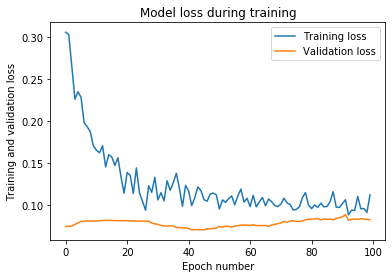

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss during training')
plt.xlabel('Epoch number')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss'])

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('MSE: {}'.format(score))

MSE: 0.08705209722606147


In [29]:
real_values = y_test.values.tolist()

y_predict = model.predict(X_test)
predicted = [item for sublist in y_predict for item in sublist]

In [30]:
average_list = []
for i in range(len(real_values)):
    average_list.append(real_values[i]- predicted[i])

In [31]:
np.average(average_list)

0.03720925566626758

In [34]:
print(real_values[25])
print(y_predict[25])

[0, 0]
[0. 0.]


In [35]:
print(real_values[4])
print(y_predict[4])

[0, 1]
[0. 0.]
